# Sympy (symbolic python)

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Introduction

Symbols can be defined as follows:

In [8]:
x = smp.symbols('x')
y = smp.symbols('y')
x +y
a =4
b=5

In [10]:
x
y

y

You can then use various mathematical operators on the defined symbols

In [3]:
x**2

x**2

In [4]:
# In sympy there is a lot of potential to build up variable
y = smp.sin(x)
y

sin(x)

There are many many functions built into sympy

In [ ]:
# take a look all the function typing smp. and pressing tab
y.

Can save expressions in new variables

In [13]:
# let's define a polinomyal
y = x**2 + 4*x + 3

Do operations on the new variables:

In [15]:
# and let's define another variable z builded on y and x
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [16]:
z.factor()

(x + 1)**2*(x + 3)**2

In the notation `smp.solve(f,x)`, sympy finds the value of $x$ that makes $f(x)=0$. 

In [17]:
smp.solve(z,x)

[-3, -1]

In [18]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [21]:
x = smp.symbols('x', Real=False, positive=False)
a=x**2+1
a

x**2 + 1

In [22]:
smp.solve(x**2+1, x)

[-I, I]

In [ ]:
x = smp.symbols('x', real=True, positive=False)
smp.solve(x+4, x)

Can define many variables at once

In [23]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [24]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [25]:
# I can also solve for y
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [26]:
# I can also solve for z
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [27]:
# let's take the first solution 
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [28]:
# to make a function from it, I use lambdify 
# takes as input x,y and return a number
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

3.665191429188092

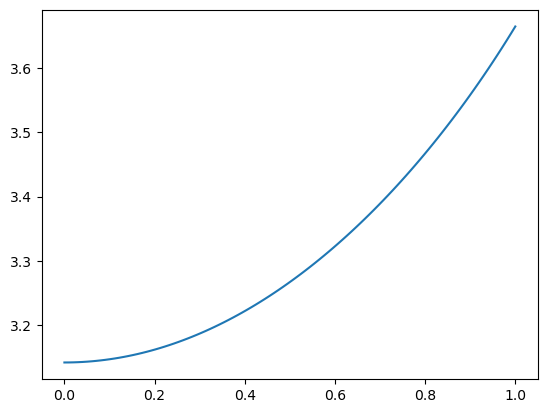

In [29]:
# let's make an array for x
x_num = np.linspace(0,1,100)
# let's fix y to 2
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

For multivariable expressions, can also substitute values in

In [ ]:
F

In [30]:
# I'm sobstituting smp.cos(z)in y and y in z
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

# Examples

A falling object (with an initial velocity)encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [34]:
# defibe the symbols we will use
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Define expressions

In [35]:
smp.Rational(1/2.)

1/2

In [36]:
#I use a symbolic object also for 1/2 
# I could have used 1/2 but I don't want to go numerical yet 
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
# I can also define the derivative
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
# I can also define the derivative
dhpdt = vp + q*t

In [37]:
h0t

-g*t**2/2 + h_0 - t*v_0

In [38]:
dhpdt

q*t + v_p

Define equations

In [39]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

Solve the equations

In [40]:
# I can solve for the two unknown t and v0 
# I watn to find the time and the velocity when the object and the platform meet at the same speed 
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [41]:
# the solution is a tuple with two elements (solution for t and solution for v)
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [42]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [43]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

**What is the velocity when they collide?**

In [44]:
# I substitute t_collide in t and v_initfall in v0
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [45]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

# Let's take a look calculus with sympy

In [46]:
x = smp.symbols('x')

## Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [47]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

In [49]:
#smp.

## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [50]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

You can also do derivative of abstract function
$$\frac{d}{dx} f(x+g(x)) $$

In [51]:
# I give an extra parameter cls=smpt.Function
f, g = smp.symbols('f g', cls=smp.Function)
f
g

g

In [52]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [53]:
f

f(x + g(x))

In [54]:
# I can not differentiate this function
dfdx = smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [55]:
# let's now substitute the generic function g with sin(x)
dfdx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [57]:
# need to call doit to actually do the derivative
dfdx.subs([(g, smp.sin(x))]).doit() 

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Basic Antiderivatives

$$ \int \csc(x) \cot (x)  dx $$

In [58]:
# there is not a + c in the result, but you actually need to add it 
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

## Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [59]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

This is a quite complicate integral that can be solved (separating by part several times)
That is actually easy with sympy
$$\int_1^t x^{10} e^x dx $$

In [60]:
t= smp.symbols('t')

In [61]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Examples

The hydrogen wave function is given by

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

a is the bohr radius

n,l,m are the quantum numbers 

L is the laguerre polynomial

The mean distance from the nucleus of the electron:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

The standard deviation in the distance from the nucleus of the electron:

$$\sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2}$$

In [62]:
from sympy import assoc_laguerre

In [66]:
#assoc_laguerre?

Define variables, be sure to specify their attributes

In [67]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

Define $R_{nl}(r)$

In [68]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

We can check to make sure this corresponds to the radial wavefunctions we expect. Lets see $R_{10}(r)$

In [69]:
#I will check that the exspression is correct looking at the 
# ground state and compare with tables values
R_10 = R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

Function to compute $\int_{0}^{\infty} R_{nl}^2 r^k dr$ for particular values of $n$, $l$ and $k$

In [70]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

Compute the mean radial distance of an electron in the state $\psi_{100}$

In [71]:
compute_int(n_val=1,l_val=0,k=3)

3*a/2

Compute the spread $\sigma$ in distances of the electron in state $\psi_{100}$

In [72]:
smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

sqrt(3)*a/2

Compute the mean radial distance of an electron in the state $\psi_{420}$

In [73]:
compute_int(n_val=1,l_val=0,k=3)

3*a/2

In [74]:
# compute mean distance as a function of the energy level
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [75]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

Text(0, 0.5, 'mean electron distance')

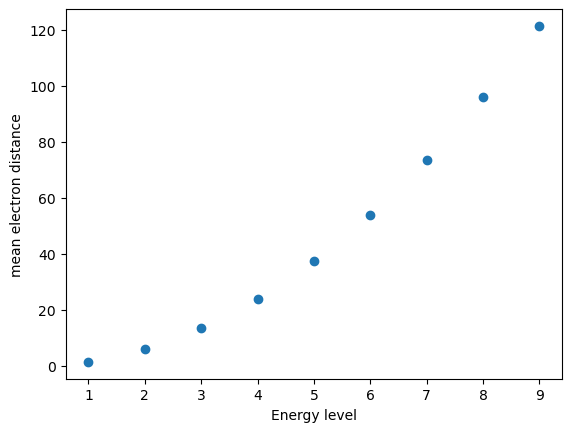

In [76]:
plt.scatter(ns, ds)
plt.xlabel('Energy level')
plt.ylabel('mean electron distance')

# Multivariable Calculus

In [77]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectors and Geometry

In [78]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

In [79]:
u

Matrix([
[u_1],
[u_2],
[u_3]])

### Addition and multiplication

In [80]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Dot product

In [81]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Cross product

In [82]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Norm

In [83]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [84]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Lines: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

In [85]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [86]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

## Vector Calculus

### Vector Derivatives

In [ ]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

In [ ]:
smp.diff(r,t)

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [ ]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

Find theta at $t=6$

In [ ]:
theta.subs(t,6).evalf()

### Vector Integrals

(Note: Will not add the +C)

In [ ]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

In [ ]:
smp.Integral(r,t)#.doit()

In [ ]:
smp.Integral(r,t).doit()

Some cases integrals can't be solved analytically - > see Second Year in Calculus video

In [ ]:
from scipy.integrate import quad_vec

In [ ]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

In [ ]:
# lambdify this function
r_f = smp.lambdify([t], r)

In [ ]:
r_f(1)

In [ ]:
# vector integral
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

### Arclength

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [ ]:
r = smp.Matrix([0, t, t**2])
r

In [ ]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

# Examples

The magnetic field at a point $\vec{r}$ of a current configuration is 

$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

where $\vec{r} = (x,y,z)$ and $\vec{l} = (f(t), g(t), h(t))$ is a 1D curve in space that gives the location of the wire.

**Part 1: Use Sympy to find the integrand as a single 3-vector**

In [ ]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

Define $\vec{r}$, $\vec{\ell}$ and $\vec{d\ell/dt}$

In [ ]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)

Define integrand

In [ ]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3

In [ ]:
dBdt

**Part 2**: Find the magnetic field a distance $H$ above a ring of radius $R$ flowing clockwise

In [ ]:
R, H = smp.symbols('R, H', real=True)

In [ ]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Find magnetic field

In [ ]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

For more ccomplicated electrical wire configurations, see my video on solving for the magnetic field of an arbtriary wire (uses numerical integration)

## Partial/Directional Derivatives

In [ ]:
x, y, z = smp.symbols('x y z')

### Basics

Partial Derivatives $\partial f / \partial x$ and $\partial f / \partial y$ of $f(x,y)=y^2\sin(x+y)$

In [ ]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

In [ ]:
smp.diff(f,y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [ ]:
smp.diff(f,y,y,x)

### The Chain Rule

In [ ]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$ 
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [ ]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [ ]:
w

Can keep things in a more functional form:

In [ ]:
smp.diff(w,t)

Or put in specific functions:

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)

In [ ]:
w1

In [ ]:
smp.diff(w1,t)

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

## Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

## Lagrangian Mechanics

The (simplified) idea of Lagrangian mechanics is the that kinetic energy and potential energy of a system can be expressed in terms of generalized coordinates and velocity

$$T = T(q,\dot{q}) \hspace{20mm} V=V(q,\dot{q})$$

where $q$ could be xyz of a point particle, or some angle $\theta$ (pendulum), or whatever makes the problem easiest to solve. The defining $L=T-V$, the following equation gives the equations of motion $q(t)$

$$\frac{dL}{dq} - \frac{d}{dt}\frac{dL}{d\dot{q}} = 0 $$

for all the different $q$'s of the system. The equation above gives a second order differential equation for all the different $q(t)$s.

**Example**: Find the equations of motion (in the form of differential equations)

<p align="center">
  <img src="symp_tut_p1.PNG" alt="drawing" width="300" align="center"/>
</p>

Let $(x,y)$ be the position of the pendulum bob

In [ ]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta,t)

Define location of pendulum

In [ ]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)

In [ ]:
y

Kinetic and potential energies

In [ ]:
T1 = smp.Rational(1,2) * m1 * smp.diff(z,t)**2
T2 = smp.Rational(1,2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
T = T1 + T2
V1 = 0
V2 = m2*g*y
V = V1 + V2

Get Lagrangian

In [ ]:
L = T-V

In [ ]:
L

Get Lagranges equations of motion

In [ ]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L,dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L,dthedt), t)

In [ ]:
LE1

In [ ]:
LE2

We want a system of two second order differential equations that we can solve

In [ ]:
sols = smp.solve([LE1, LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])

In [ ]:
sols

Find $d^2 \theta / dt^2 = $

In [ ]:
sols[smp.diff(theta,t,t)]

Find $d^2 z / dt^2 = $

In [ ]:
sols[smp.diff(z,t,t)]

With these two second order differential equations, the system can be numerically solved! (See any of my videos on Lagrangian mechanics)